In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


# Obesity Levels
Prediction of Obesity Levels Based on Eating Habits and Physical Activity

**Dataset Information**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

* Gender: Feature, Categorical, "Gender"
* Age : Feature, Continuous, "Age"
* Height: Feature, Continuous
* Weight: Feature Continuous
* family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

* FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
* FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
* NCP : Feature, Continuous, " How many main meals do you have daily? "
* CAEC : Feature, Categorical, " Do you eat any food between meals? "
* SMOKE : Feature, Binary, " Do you smoke? "
* CH2O: Feature, Continuous, " How much water do you drink daily? "
* SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
* FAF: Feature, Continuous, " How often do you have physical activity? "
* TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

* CALC : Feature, Categorical, " How often do you drink alcohol? "
* MTRANS : Feature, Categorical, " Which transportation do you usually use? "
* NObeyesdad : Target, Categorical, "Obesity level"

## Objectives
1. Conduct a brief exploratory data analysis
2. Perform any necessary pre-processing before implementing classification models
3. Train and tune a variety of models and compare their relative performance using appropriate metrics
4. Identify the most appropriate model in terms of both accuracy and explainability
5. Consider further analysis or investigation

## Exploratory Data Analysis

In [2]:
# Imports
import pandas as pd # For data manipulation
import numpy as np # For numerical calculations

import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting

In [3]:
# Import data
address = '/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(address)

# Display the first 5 rows of the data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for missing values
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# Check the data types
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
# Check the shape of the data
df.shape

(2111, 17)

In [7]:
# Descriptive statistics
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Check the distribution of the target variable
print(df['NObeyesdad'].value_counts(normalize=True))

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


From the value counts, we can see that the target variable is balanced.

In [9]:
# Ordinal encode the target variable
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
df['NObeyesdad'] = encoder.fit_transform(df[['NObeyesdad']])

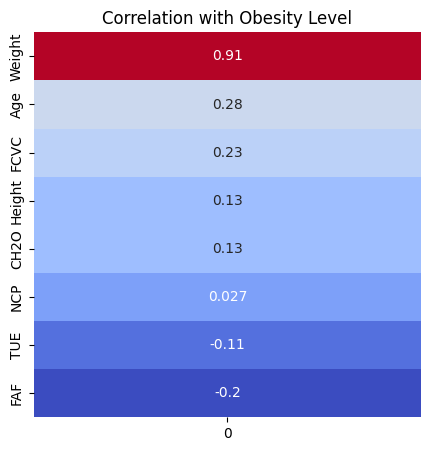

In [10]:
# Isolate continuous variables
float_cols = df.select_dtypes(include=['float64']).columns

#   Check float columns correlation with target variable
correlations = df[float_cols].corrwith(df['NObeyesdad'])[:-1].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(5, 5))
sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True, cbar=False)
plt.title('Correlation with Obesity Level')
plt.show()

* Unsuprisingly, there is a very strong correlation between weight and obesity level
* As the Weight is obviously a key predictor of Obesity, I will drop this feature from the classification model so I can assess the importance of other less obvious features
* There is weak a positive correlation between Age and Obesity Level

## Data Pre-Processing

In [11]:
# Isolate categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Check the unique values in each categorical column
for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')

Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [12]:
# Label encode Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Encode 'yes' and 'no' colums with 1 and 0
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})

# Ordinal encode 'CALC' column and 'CAEC' column
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df['CALC'] = ordinal_encoder.fit_transform(df[['CALC']])
df['CAEC'] = ordinal_encoder.fit_transform(df[['CAEC']])

# One hot encode 'MTRANS' column
df = pd.get_dummies(df, columns=['MTRANS'], drop_first=True)

# Check the data types
df.dtypes

Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
CALC                              float64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                              float64
NObeyesdad                        float64
MTRANS_Bike                          bool
MTRANS_Motorbike                     bool
MTRANS_Public_Transportation         bool
MTRANS_Walking                       bool
dtype: object

In [13]:
# Split the data into features and target variable. Drop 'Weight' due to collinearity.
X = df.drop(columns=['NObeyesdad', 'Weight'])
y = df['NObeyesdad']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification Models
* I will begin with a simple decision tree and then progress to more complex ensemble methods in the form of random forest and XGBoost
* My goal is to maximise performance whilst retaining model interpretability

In [14]:
# Import Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [15]:
# Define function to evaluate models
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

In [16]:
# Define funcion to check for overfitting
def check_overfitting(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_test)}')

In [17]:
# Create parameter grid for decision tree GridSearchCV
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
}

# Create parameter grid for random forest GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
}

# Create parameter grid for XGBoost GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
}

In [18]:
# Train best decision tree model
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
dt_best = dt_grid_search.best_estimator_

# Print best decison tree hyperparameters
print(dt_grid_search.best_params_)
print("------------------------------------------------------------")

# Check for overfitting
check_overfitting(dt_best)

{'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
------------------------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.7872340425531915


In [19]:
# Train best random forest model
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_

# Print best random forest hyperparameters
print(rf_grid_search.best_params_)
print("------------------------------------------------------------")

# Check for overfitting
check_overfitting(rf_best)

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 400}
------------------------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.8747044917257684


In [20]:
# Train best XGBoost model
xgb = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
xgb_best = xgb_grid_search.best_estimator_

# Print best XGBoost hyperparameters
print(xgb_grid_search.best_params_)
print("------------------------------------------------------------")

# Check for overfitting
check_overfitting(xgb_best)

{'max_depth': 7, 'n_estimators': 300}
------------------------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.8628841607565012


### Findings
* All three models fit perfectly to the training data. Overfitting is common for standard trees which explains the larger gap between the train and test accuracy.
* Both ensemble methods random forest and XGBoost perform better with the test set than the basic decision tree.
* Next, I will look further into the evaluation metrics for random forest and XGBoost before choose the optimal model.

In [21]:
# Evaluate random forest model
evaluate_model(rf_best)

Accuracy: 0.8794326241134752
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        56
         1.0       0.68      0.84      0.75        62
         2.0       0.90      0.80      0.85        56
         3.0       0.88      0.76      0.82        50
         4.0       0.94      0.85      0.89        78
         5.0       0.85      0.95      0.89        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.88       423
   macro avg       0.89      0.88      0.88       423
weighted avg       0.89      0.88      0.88       423



In [22]:
# Confusion matrix for random forest model
from sklearn.metrics import confusion_matrix
y_pred = rf_best.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[53,  2,  1,  0,  0,  0,  0],
       [ 2, 52,  2,  3,  3,  0,  0],
       [ 1,  9, 45,  1,  0,  0,  0],
       [ 0,  4,  2, 38,  1,  5,  0],
       [ 0,  6,  0,  1, 66,  5,  0],
       [ 0,  3,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [23]:
# Evaluate XGBoost model
evaluate_model(xgb_best)

Accuracy: 0.8628841607565012
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91        56
         1.0       0.69      0.74      0.71        62
         2.0       0.84      0.82      0.83        56
         3.0       0.85      0.78      0.81        50
         4.0       0.87      0.86      0.86        78
         5.0       0.90      0.93      0.92        58
         6.0       0.98      1.00      0.99        63

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.86      0.86      0.86       423



In [24]:
# Confusion matrix for XGBoost model
y_pred = xgb_best.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50,  2,  3,  0,  1,  0,  0],
       [ 4, 46,  3,  4,  5,  0,  0],
       [ 0,  8, 46,  0,  1,  1,  0],
       [ 0,  2,  3, 39,  2,  3,  1],
       [ 0,  7,  0,  2, 67,  2,  0],
       [ 0,  2,  0,  1,  1, 54,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

* Random Forest outperforms XGBoost for all of precision, recall, and f1-score
* Random Forest also tends to be more interpretable than XGBoost as bagging is a simpler ensemble method than gradient boosting

### Interpret the Random Forest Model Results

In [25]:
# Determine feature importance of random forest model
feature_importances = rf_best.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
importances

Age                               0.146278
FCVC                              0.144363
Height                            0.110548
NCP                               0.081624
TUE                               0.079389
Gender                            0.076570
FAF                               0.069203
CH2O                              0.066848
family_history_with_overweight    0.058423
CAEC                              0.049743
CALC                              0.048778
MTRANS_Public_Transportation      0.031401
FAVC                              0.020897
SCC                               0.007808
MTRANS_Walking                    0.004105
SMOKE                             0.002773
MTRANS_Motorbike                  0.000823
MTRANS_Bike                       0.000426
dtype: float64

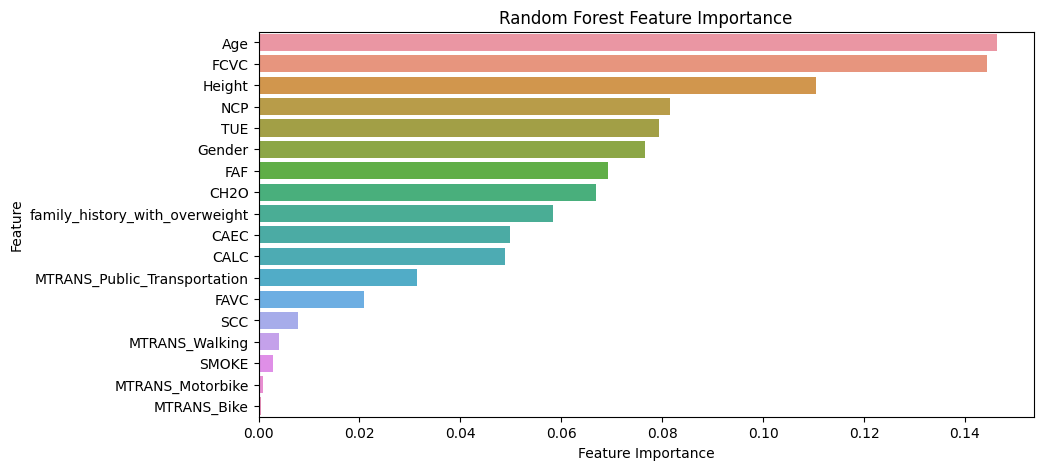

In [26]:
# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**The top 3 features are:**
* **'Age'**: An increase in age increases the chance of obesity. This makes sense as an increasing age may mean a more sedentary lifestyle and slower metabolism.
* **'FCVC' (" Do you usually eat vegetables in your meals? ")**: This indicates eating vegetables in meals increases the risk of obesity which is not something I expected. This is likely a case of 'correlation does not imply causation'. Further research into this could clarify any uncertainty and domain knowledge would be useful here.
* **'Height'**: Another non-obvious factor contributing to obesity.

Visualisations are below which may uncover further insights

In [27]:
# Decode the ordinal encoded target variable
df['NObeyesdad'] = df['NObeyesdad'].replace({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})

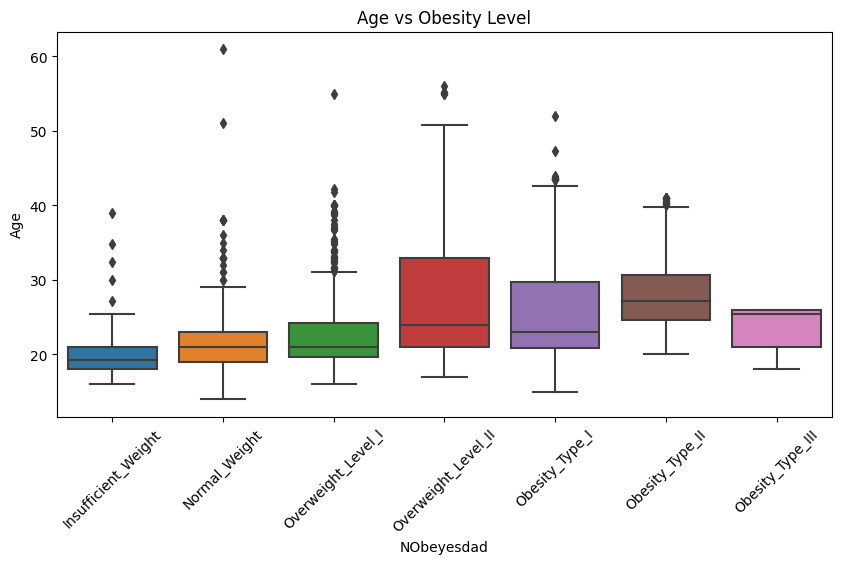

In [28]:
# Plot 'Age' against 'NObeyesdad' categories
categories=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='NObeyesdad', y='Age', data=df, order=categories, ax=ax)
plt.xticks(rotation=45)
plt.title('Age vs Obesity Level')
plt.show()

The above visualisation shows that as we progress through obesity categories, from underweight to most obese, the median age generally increases. This suggests older people are at higher risk of obesity, whereas younger peoople are at higher risk of being underweight.

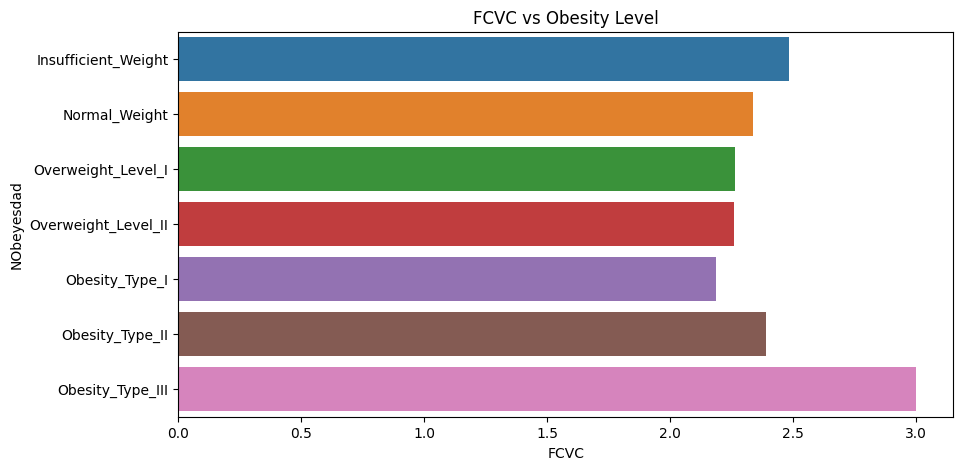

In [29]:
# Bar plot 'FCVC' against 'NObeyesdad' categories 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='FCVC', y='NObeyesdad', data=df, ax=ax, order=categories, errorbar=None)
plt.title('FCVC vs Obesity Level')
plt.show()

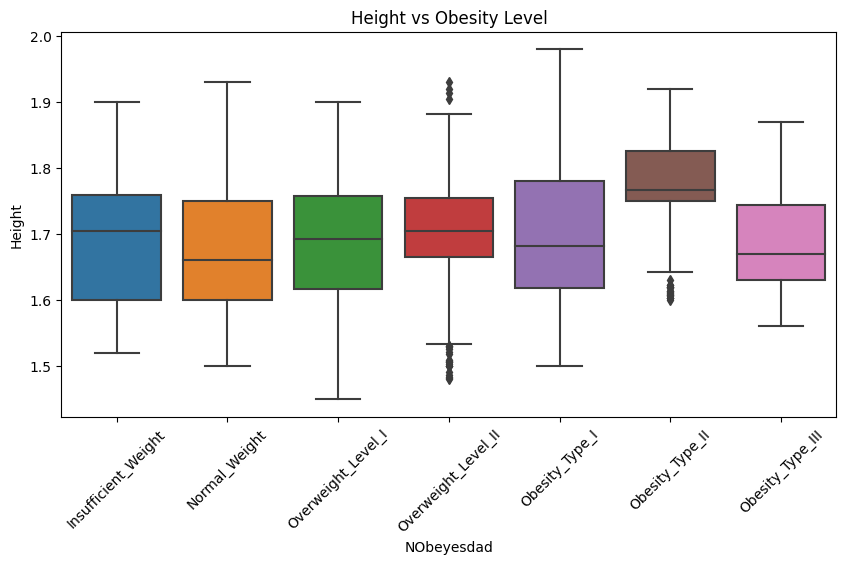

NObeyesdad
Insufficient_Weight    1.704180
Normal_Weight          1.660000
Obesity_Type_I         1.681855
Obesity_Type_II        1.767140
Obesity_Type_III       1.668995
Overweight_Level_I     1.691638
Overweight_Level_II    1.703914
Name: Height, dtype: float64


In [30]:
# Plot 'Height' against 'NObeyesdad' categories
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='NObeyesdad', y='Height', data=df, order=categories, ax=ax)
plt.xticks(rotation=45)
plt.title('Height vs Obesity Level')
plt.show()

# Print the median 'Height' for each 'NObeyesdad' category
print(df.groupby('NObeyesdad')['Height'].median())

* There is no obvious global trend between heigh and obesity
* The median height value for 'Obesity_Type_II' is significantly higher than for the other categories which may be skewing the models perception of the importance of height to obesity.

## Conclusion
* This notebook was mostly aimed at practicing classification modelling with the goal of achieving high performance whilst maintaining interpretability.
* This work does not clearly explain why height and vegetable consumption are deemed important to obesity risk. This notebookk could be improved upon by including a more detailed EDA which may uncover the cause for these feature importance results.